<a href="https://colab.research.google.com/github/vivek-boini/Uber-Trip-Data-Analysis/blob/main/DAV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> DAV COURSE END PROJECT

Roll no : 160123737036\
Name    : Boini Vivek \
Section : IT-1

# Uber Pickup Data: Analyze pickup locations and trends

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# Load data
df = pd.read_csv('/content/uber_data.csv')

In [ ]:
df.head()

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned
3,07/01/2014,09:00 AM,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned
4,07/01/2014,09:30 AM,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned


In [ ]:
df.describe()

,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
count,276,276,269,267,276,276,276
unique,83,95,240,129,264,264,3
top,07/03/2014,10:00 AM,"John F Kennedy International Airport, Delta Ai...",John F Kennedy International Airport;,"PU: 607 20 St., BK NY; DO: John F Kennedy Inte...","607 20 St., BK NY; DO: John F Kennedy Internat...",Arrived
freq,12,11,4,70,3,3,128


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             276 non-null    object
 1   Time             276 non-null    object
 2   PU_Address       269 non-null    object
 3   DO_Address       267 non-null    object
 4   Routing Details  276 non-null    object
 5   PU_Address.1     276 non-null    object
 6   Status           276 non-null    object
dtypes: object(7)
memory usage: 15.2+ KB


In [ ]:
n=int(input("Enter no of rows to show from top: "))
df.head(n)

Enter no of rows to show from top: 3


,Date,Time,PU_Address,DO_Address,Routing Details,PU_Address.1,Status
0,07/01/2014,07:15 AM,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled
1,07/01/2014,07:30 AM,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived
2,07/01/2014,08:00 AM,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned


In [ ]:
df.dtypes

,0
Date,object
Time,object
PU_Address,object
DO_Address,object
Routing Details,object
PU_Address.1,object
Status,object


In [ ]:
print("shape:" ,df.shape)
print("coloumns: ",df.columns)

shape: (276, 7)
coloumns:  Index(['Date', 'Time', 'PU_Address', 'DO_Address', 'Routing Details',
       'PU_Address.1', 'Status'],
      dtype='object')


In [ ]:
# Convert to datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract time features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['datetime'].dt.month

# Extract borough from addresses
def extract_borough(address):
    if 'BK NY' in str(address): return 'Brooklyn'
    elif 'NY NY' in str(address): return 'Manhattan'
    elif 'BX NY' in str(address): return 'Bronx'
    elif 'NJ' in str(address): return 'New Jersey'
    else: return 'Other'

df['PU_borough'] = df['PU_Address'].apply(extract_borough)
df['DO_borough'] = df['DO_Address'].apply(extract_borough)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Date               0
Time               0
PU_Address         7
DO_Address         9
Routing Details    0
PU_Address.1       0
Status             0
datetime           0
hour               0
day_of_week        0
month              0
PU_borough         0
DO_borough         0
dtype: int64


In [ ]:
#Data set details
print(f"Total trips: {len(df)}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

Total trips: 276
Date range: 2014-07-01 07:15:00 to 2014-09-28 21:00:00


In [ ]:
# Sort by datetime (newest to oldest)
df_sorted = df.sort_values('datetime', ascending=False)

# Display first 5 sorted records
print(df_sorted[['datetime', 'PU_Address', 'DO_Address']].head())

               datetime                                       PU_Address  \
275 2014-09-28 21:00:00                               152 7 Ave., BK NY;   
274 2014-09-27 08:00:00                       474 Sackett Street, BK NY;   
273 2014-09-27 05:00:00                       474 Sackett Street, BK NY;   
272 2014-09-26 16:00:00                              20 West St., NY NY;   
271 2014-09-25 12:00:00  907 59 St., BK NY; ST: W66 St./Broadway, NY NY;   

                                            DO_Address  
275                           Grand Central Station ;   
274  Newark Liberty International Airport, Virgin A...  
273  John F Kennedy International Airport, Virgin A...  
272                               La Guardia Airport;   
271             John F Kennedy International Airport;   


In [ ]:
# Sort by pickup borough then time
df_sorted = df.sort_values(['PU_borough', 'datetime'])

# Display Brooklyn pickups sorted by time
print(df_sorted[df_sorted['PU_borough'] == 'Brooklyn'].head(3))

         Date      Time                                  PU_Address  \
0  07/01/2014  07:15 AM  Brooklyn Museum, 200 Eastern Pkwy., BK NY;   
2  07/01/2014  08:00 AM                    60 Glenmore Ave., BK NY;   
3  07/01/2014  09:00 AM                     128 East 31 St., BK NY;   

                    DO_Address  \
0   1 Brookdale Plaza, BK NY;    
2  2171 Nostrand Ave., BK NY;    
3        369 93rd St., BK NY;    

                                     Routing Details  \
0  PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...   
2  PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...   
3  PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...   

                                        PU_Address.1     Status  \
0  Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...  Cancelled   
2  60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...   Assigned   
3  128 East 31 St., BK NY; DO: 369 93rd St., BK NY;    Assigned   

             datetime  hour  day_of_week  month PU_borough DO_borough  
0 2014-07-01

In [ ]:
# Filter completed trips in Manhattan and displaying date
completed_manhattan = df.loc[(df['PU_borough'] == 'Manhattan') & (df['Status'] == 'Assigned')]
print(completed_manhattan['Date'])

43     07/06/2014
88     07/19/2014
175    08/20/2014
179    08/22/2014
180    08/22/2014
184    08/23/2014
272    09/26/2014
Name: Date, dtype: object


In [ ]:
# Filter weekend trips (Sat=5, Sun=6)
weekend_trips = df.loc[df['day_of_week'].isin([5, 6])]
print(weekend_trips['PU_borough'].head(5),weekend_trips['DO_borough'].head(5))

35    Brooklyn
36    Brooklyn
37    Brooklyn
38    Brooklyn
39    Brooklyn
Name: PU_borough, dtype: object 35    Other
36    Other
37    Other
38    Other
39    Other
Name: DO_borough, dtype: object


In [ ]:
# Get Brooklyn pickups on Friday evening
brooklyn_friday_evening = df[
    (df['PU_borough'] == 'Brooklyn') &
    (df['day_of_week'] == 4) &  # Friday
    (df['hour'].between(17, 20))  # 5pm-8pm
]
print("\nBrooklyn Friday evening pickups:")
print(brooklyn_friday_evening[['datetime', 'PU_Address', 'DO_Address']].head())



Brooklyn Friday evening pickups:
               datetime                      PU_Address  \
125 2014-08-01 18:05:00            543 17th St., BK NY;   
150 2014-08-08 18:00:00        1026 66th Street, BK NY;   
166 2014-08-15 17:30:00              932 62 St., BK NY;   
263 2014-09-19 17:25:00  266 Prospect Park West, BK NY;   

                                 DO_Address  
125  John F Kennedy International Airport;   
150               562 Grand Avenue, BK NY;   
166  John F Kennedy International Airport;   
263              150 Eastern Pkwy., BK NY;   


In [ ]:
#couting status
status_counts = df['Status'].value_counts()
print(status_counts)

Status
Arrived      128
Assigned     119
Cancelled     29
Name: count, dtype: int64


In [ ]:
#percentage of each status
status_percent = df['Status'].value_counts(normalize=True).mul(100).round(1)
print(status_percent)

Status
Arrived      46.4
Assigned     43.1
Cancelled    10.5
Name: proportion, dtype: float64


In [ ]:
#top 5 pickup locations
top_pickups = df['PU_Address'].value_counts().head(5)
print(top_pickups)

PU_Address
John F Kennedy International Airport, Delta Air Lines;    4
La Guardia Airport, American Airlines;                    3
607 20 St., BK NY;                                        3
657 St Marks Ave., BK NY;                                 2
35 McDonald Ave., BK NY;                                  2
Name: count, dtype: int64


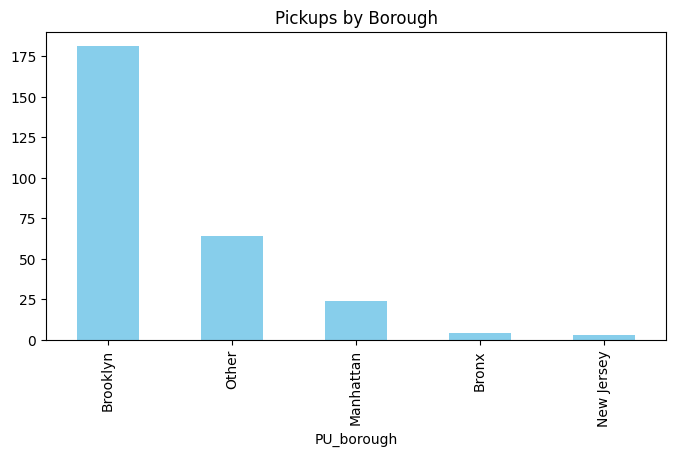

In [ ]:
plt.figure(figsize=(8,4))
df['PU_borough'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Pickups by Borough')
plt.show()




>***EXPLORATORY DATA ANALYSIS***



1. Temporal Analysis

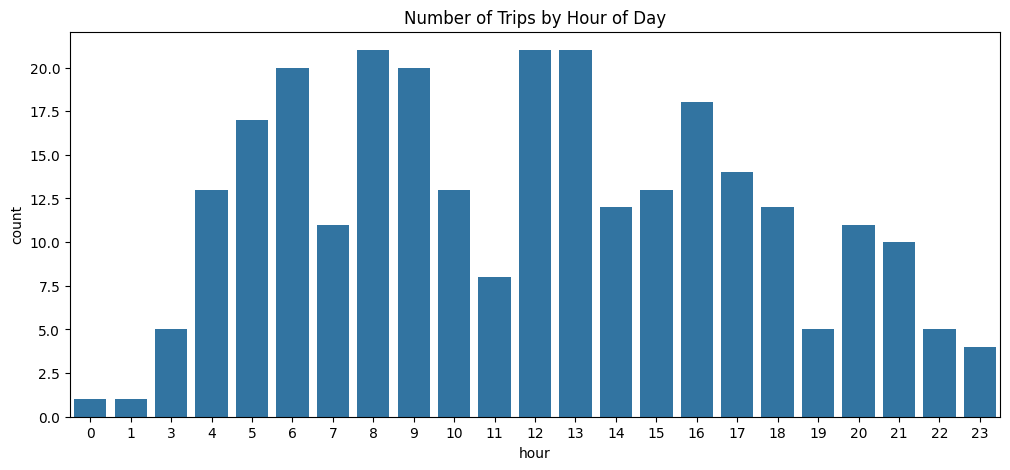

In [ ]:
# Trips by hour
plt.figure(figsize=(12, 5))
sns.countplot(x='hour', data=df)
plt.title('Number of Trips by Hour of Day')
plt.show()


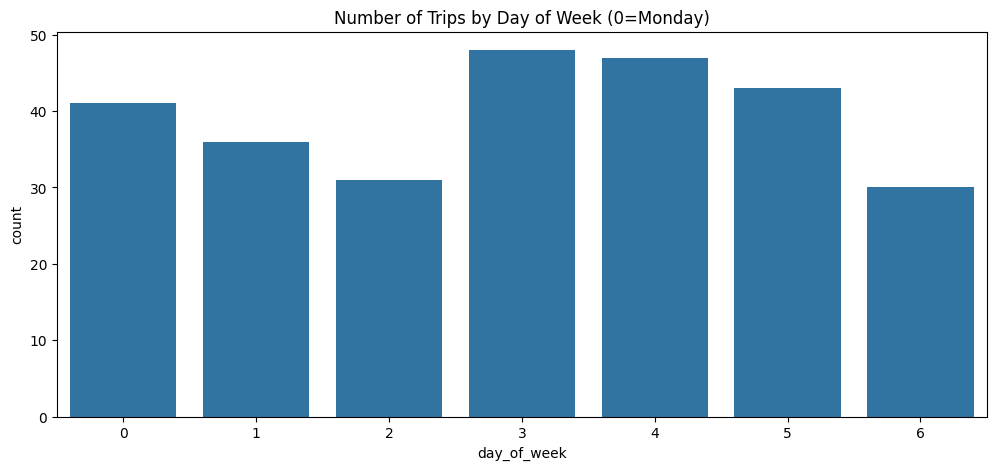

In [ ]:
# Trips by day of week
plt.figure(figsize=(12, 5))
sns.countplot(x='day_of_week', data=df)
plt.title('Number of Trips by Day of Week (0=Monday)')
plt.show()

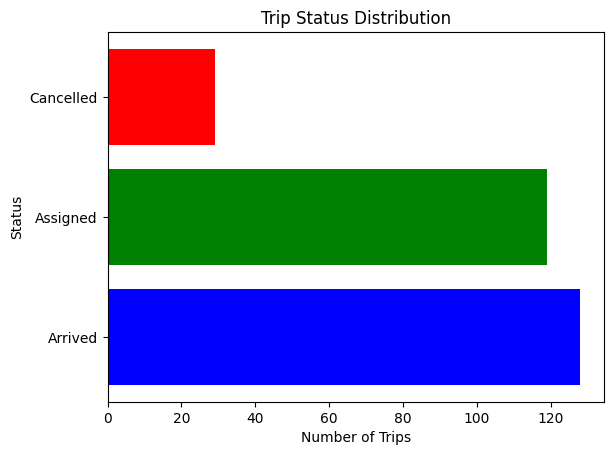

In [ ]:
# Trip Status
status_counts = df['Status'].value_counts()
plt.barh(status_counts.index, status_counts.values, color=['blue', 'green', 'red'])
plt.xlabel('Number of Trips')
plt.ylabel('Status')
plt.title('Trip Status Distribution')

plt.show()

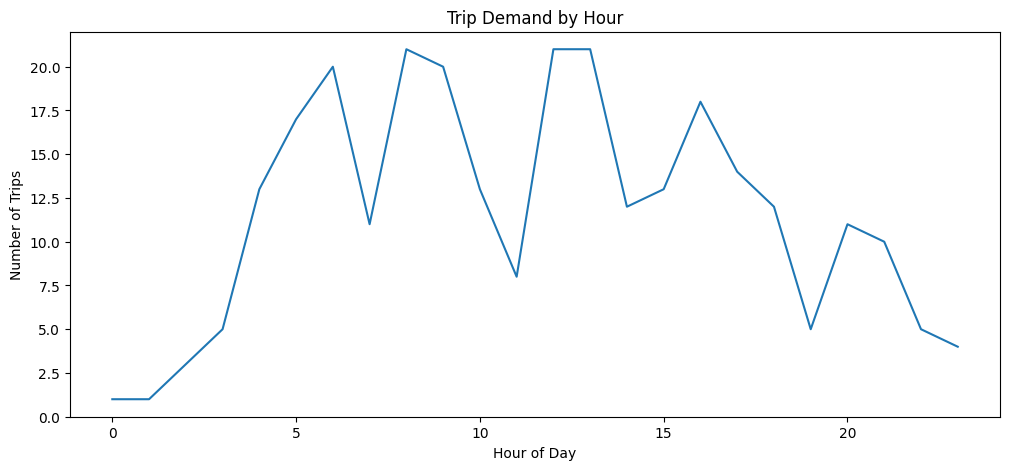

In [ ]:
# Trips per hour (demand trend)
trips_per_hour = df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values)
plt.title('Trip Demand by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

2. SPATIAL ANALYSIS

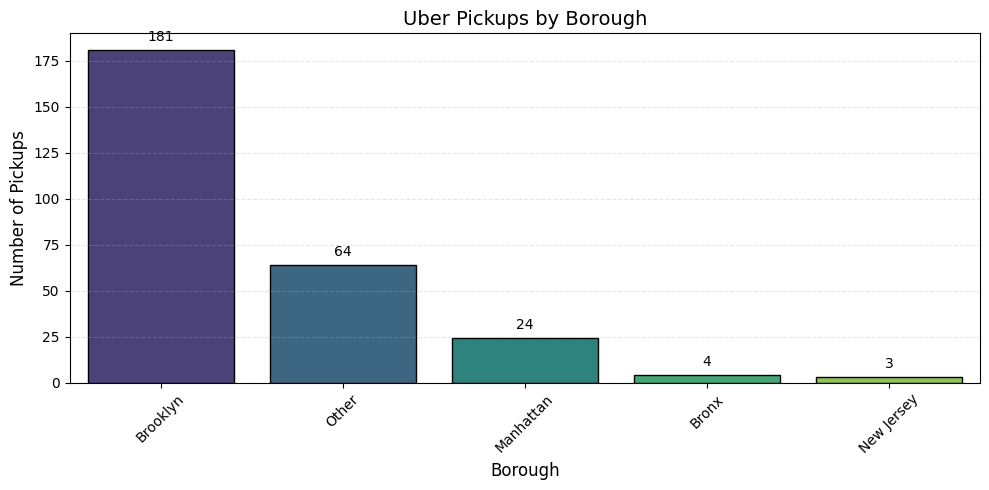

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=borough_counts.index,
    y=borough_counts.values,
    hue=borough_counts.index,
    palette='viridis',
    edgecolor='black',
    legend=False
)

plt.title('Uber Pickups by Borough', fontsize=14)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)


for i, count in enumerate(borough_counts.values):
    plt.text(i, count+5, str(count), ha='center')

plt.tight_layout()
plt.show()

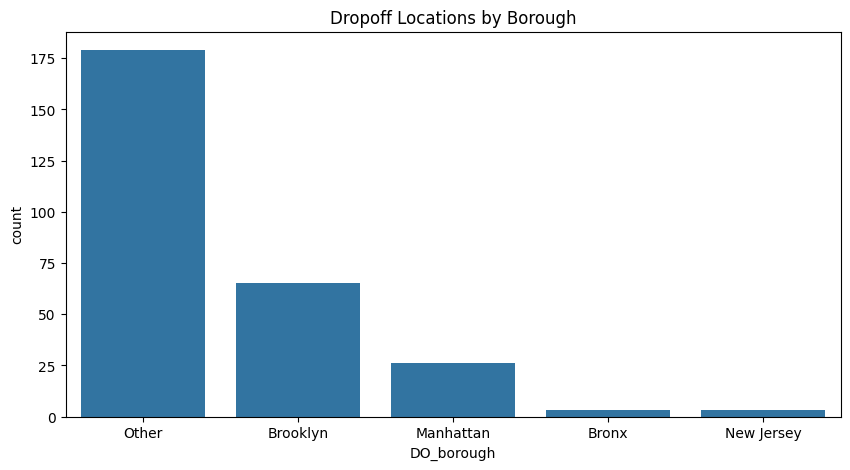

In [ ]:
# Dropoff locations by borough
plt.figure(figsize=(10, 5))
sns.countplot(x='DO_borough', data=df, order=df['DO_borough'].value_counts().index)
plt.title('Dropoff Locations by Borough')
plt.show()



3. AIRPORT TRIP ANALYSIS



In [ ]:
# Filter airport trips
airports = ['John F Kennedy', 'La Guardia', 'Newark Liberty']
df['is_airport_pickup'] = df['PU_Address'].str.contains('|'.join(airports), case=False)
df['is_airport_dropoff'] = df['DO_Address'].str.contains('|'.join(airports), case=False)

# Airport trips count
airport_trips = df[df['is_airport_pickup'] | df['is_airport_dropoff']]
print(f"Total airport-related trips: {len(airport_trips)}")


Total airport-related trips: 186


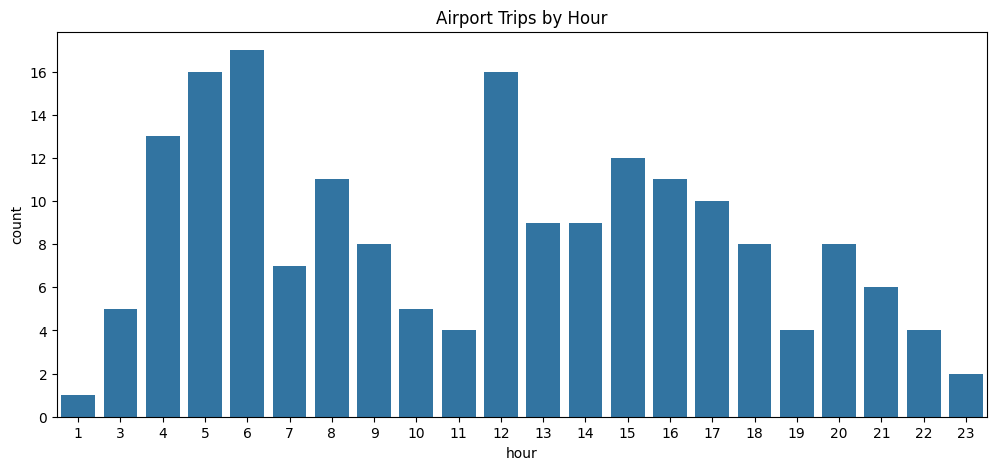

In [ ]:
# Airport trips by hour
plt.figure(figsize=(12, 5))
sns.countplot(x='hour', data=airport_trips)
plt.title('Airport Trips by Hour')
plt.show()



> ***GEOSPATIAL ANALYSIS***



1. HOTSPOT IDENTIFICATION

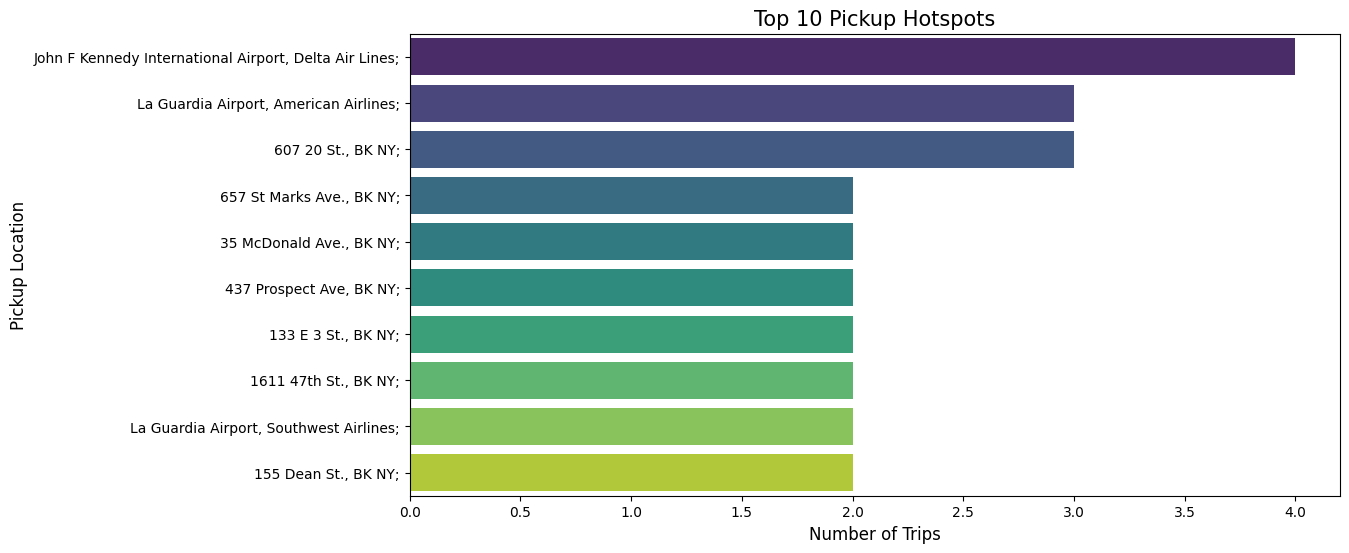

In [ ]:
# Top 10 Pickup Locations
top_pickups = df['PU_Address'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickups.values, y=top_pickups.index, hue=top_pickups.index, palette='viridis', legend=False)
plt.title('Top 10 Pickup Hotspots', fontsize=15)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Pickup Location', fontsize=12)
plt.xticks(rotation=0)
plt.show()

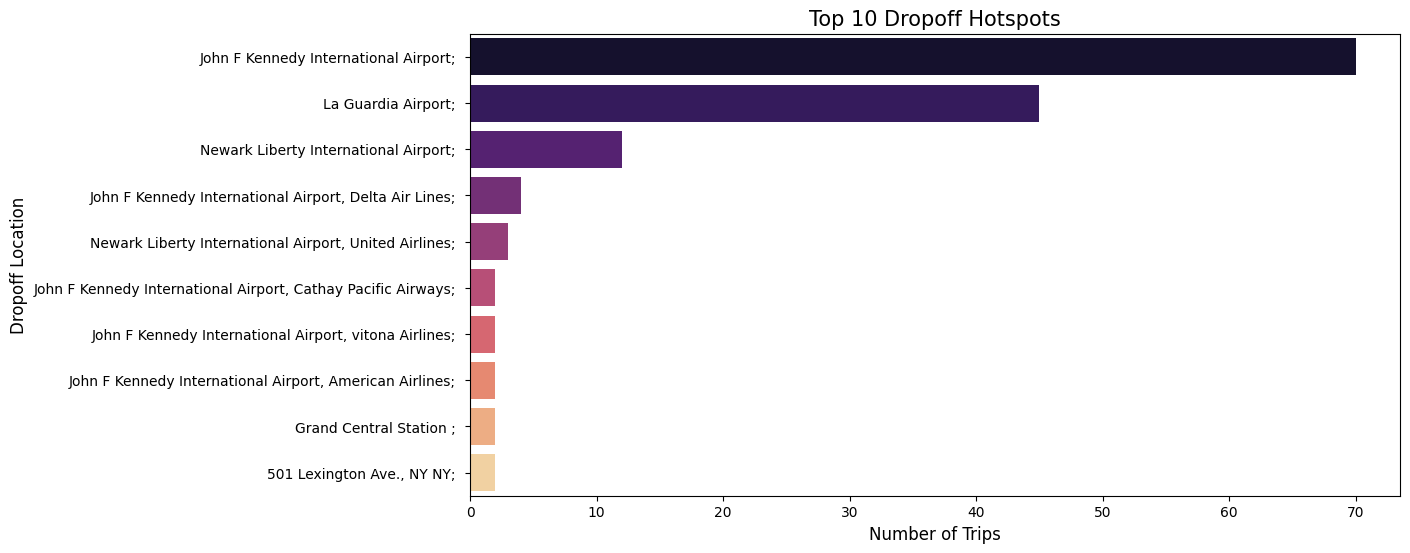

In [ ]:
# Top 10 Dropoff Locations
top_dropoffs = df['DO_Address'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, hue=top_dropoffs.index, palette='magma',legend=False)
plt.title('Top 10 Dropoff Hotspots', fontsize=15)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Dropoff Location', fontsize=12)
plt.show()

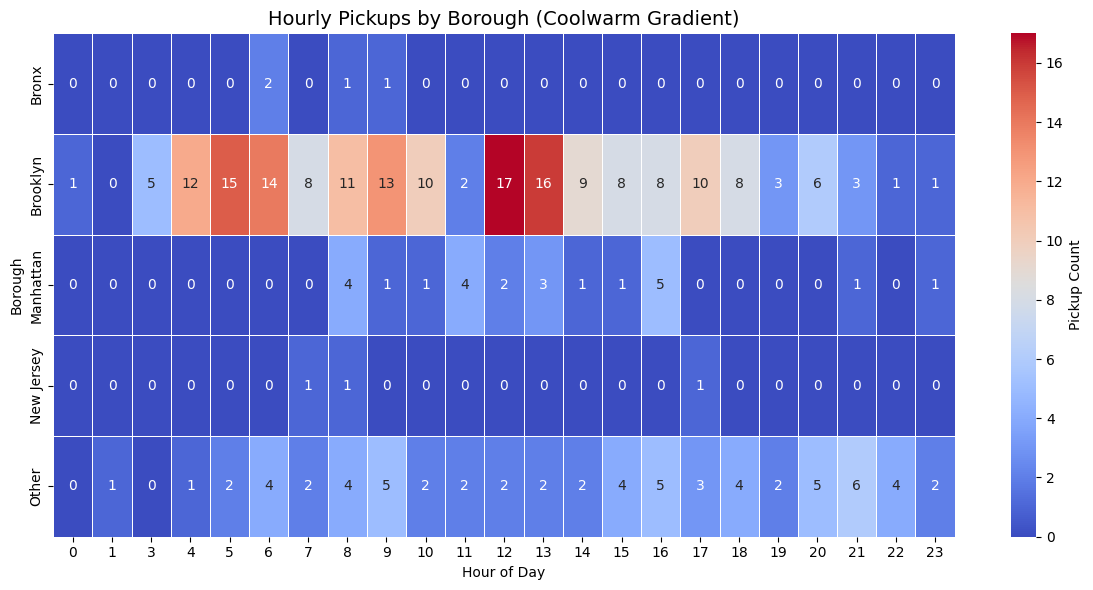

In [ ]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(
    pd.crosstab(df['PU_borough'], df['hour']),
    cmap='coolwarm',  # Blue (low) → Red (high)
    annot=True,       # Show counts
    fmt='d',          # Integer formatting
    linewidths=0.5,
    cbar_kws={'label': 'Pickup Count'}
)

plt.title('Hourly Pickups by Borough (Coolwarm Gradient)', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Borough')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Display top hotspots as a pandas DataFrame
print("Top 5 Hotspots Summary")
hotspot_table = pd.DataFrame({
    'Rank': range(1, 6),
    'Pickup Location': top_pickups.index[:5],
    'Pickup Trips': top_pickups.values[:5],
    'Dropoff Location': top_dropoffs.index[:5],
    'Dropoff Trips': top_dropoffs.values[:5]
})

print(hotspot_table)

Top 5 Hotspots Summary
   Rank                                    Pickup Location  Pickup Trips  \
0     1  John F Kennedy International Airport, Delta Ai...             4   
1     2             La Guardia Airport, American Airlines;             3   
2     3                                 607 20 St., BK NY;             3   
3     4                          657 St Marks Ave., BK NY;             2   
4     5                           35 McDonald Ave., BK NY;             2   

                                    Dropoff Location  Dropoff Trips  
0             John F Kennedy International Airport;              70  
1                               La Guardia Airport;              45  
2             Newark Liberty International Airport;              12  
3  John F Kennedy International Airport, Delta Ai...              4  
4  Newark Liberty International Airport, United A...              3  


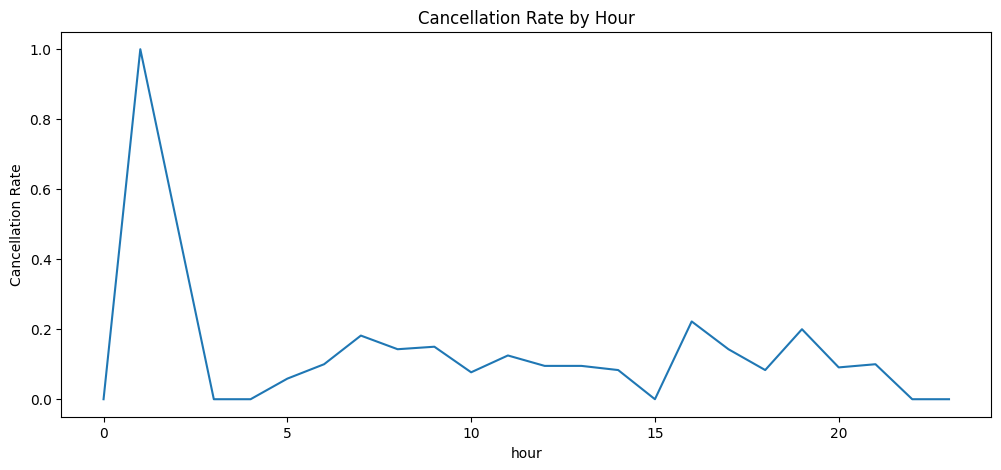

In [ ]:
# Cancellation rate by hour
cancellation_rate = df.groupby('hour')['Status'].apply(lambda x: (x == 'Cancelled').mean()).reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='hour', y='Status', data=cancellation_rate)
plt.title('Cancellation Rate by Hour')
plt.ylabel('Cancellation Rate')
plt.show()

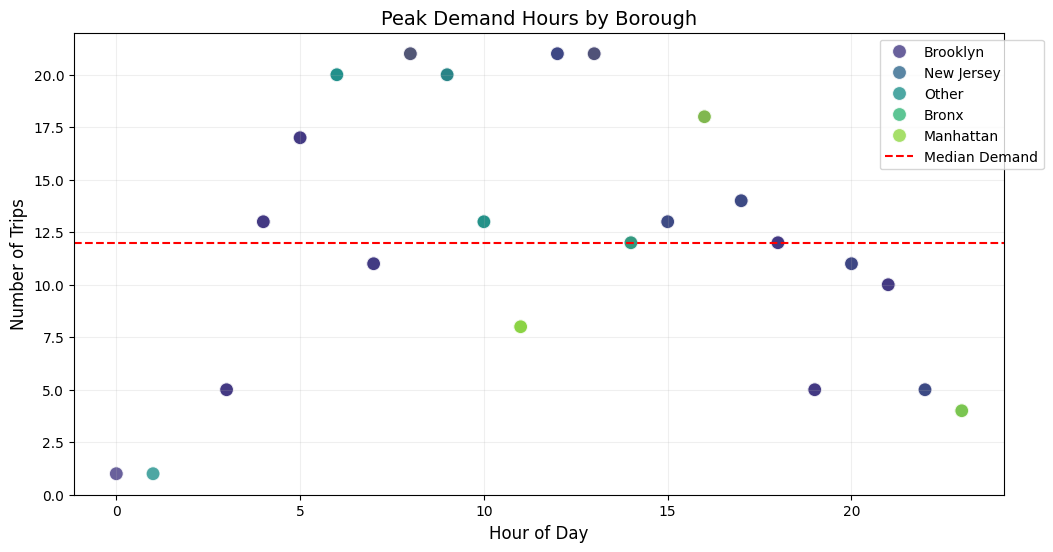

In [ ]:
#Peak Demand Identification
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='hour',
    y=df.groupby('hour')['hour'].transform('count'),  # Trip count per hour
    hue='PU_borough',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Peak Demand Hours by Borough', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.axhline(y=df.groupby('hour').size().median(), color='red', linestyle='--', label='Median Demand')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.2)
plt.show()